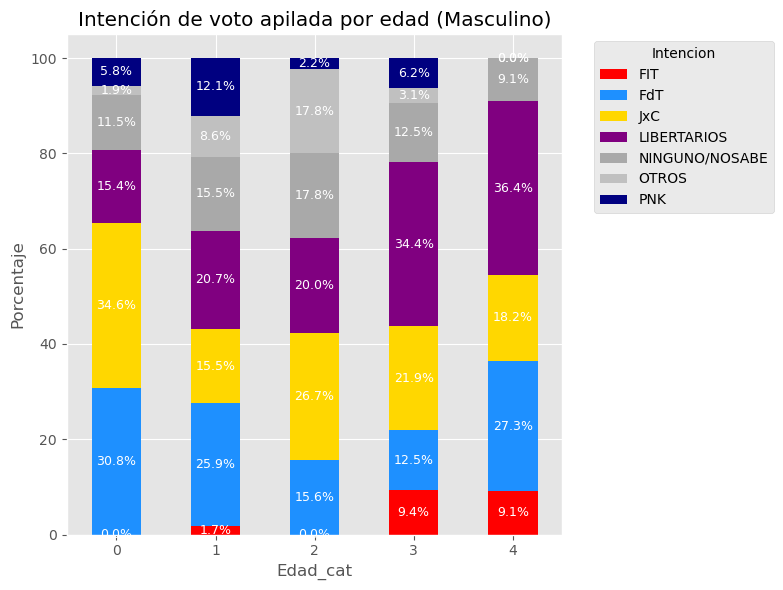

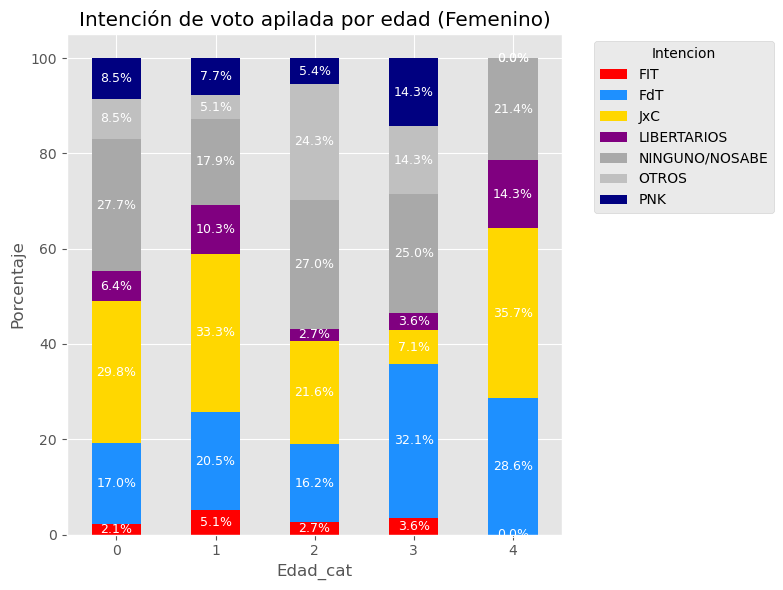

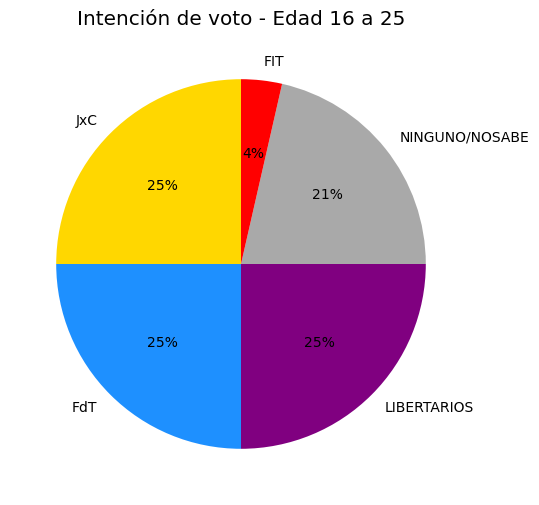

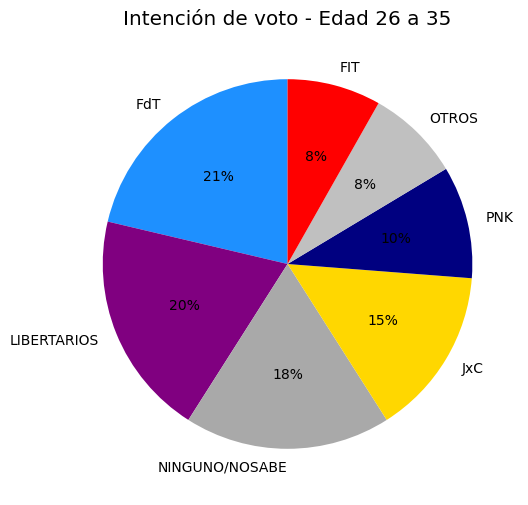

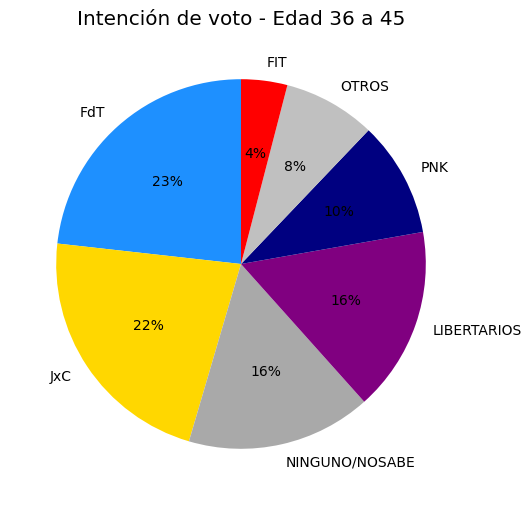

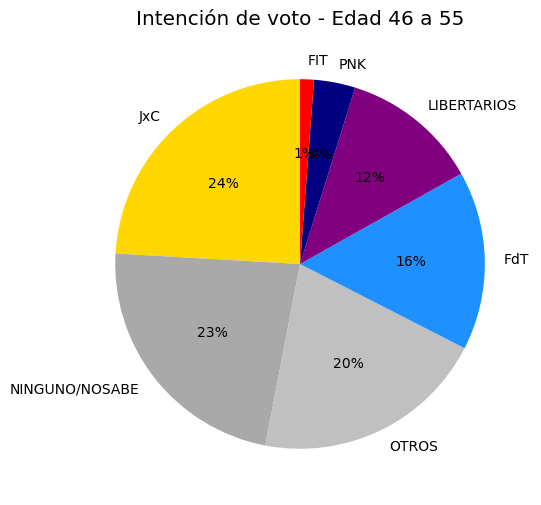

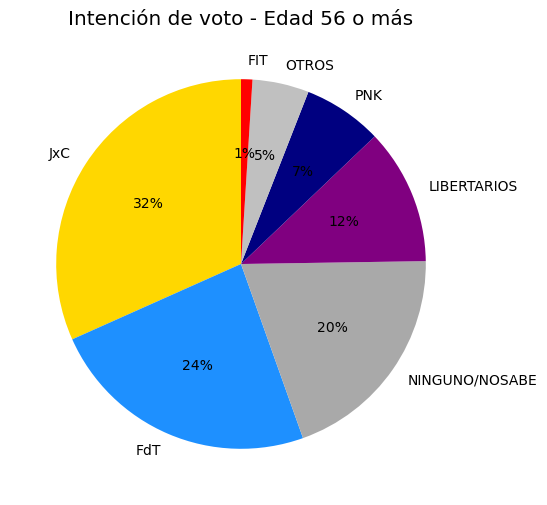

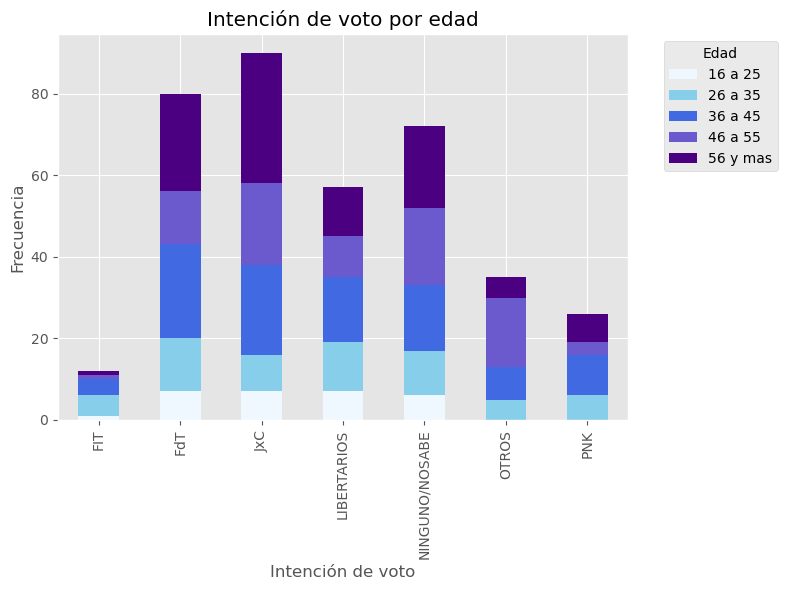

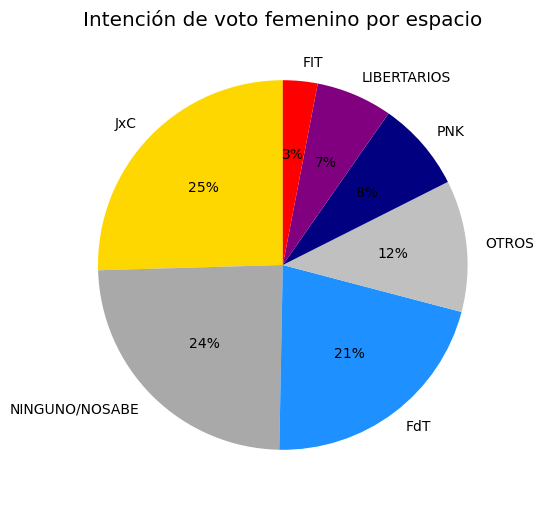

In [2]:
# Importar paquetes
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Diccionario de colores para intenciones y edades
categorias = {
    'intencion': {
        'JxC': 'gold',
        'FdT': 'dodgerblue',
        'LIBERTARIOS': 'purple',
        'NINGUNO/NOSABE': 'darkgrey',
        'OTROS': 'silver',
        'PNK': 'navy',
        'FIT': 'red'
    }
}

categorias_edad = {
    '16 a 25': 'aliceblue',
    '26 a 35': 'skyblue',
    '36 a 45': 'royalblue',
    '46 a 55': 'slateblue',
    '56 y mas': 'indigo'
}

# Cargar y preparar los datos
data = pd.read_excel('data/rosario f.xlsx')
data.columns = [col.lower() for col in data.columns]
data.rename(columns={'int de voto x espacio': 'intencion'}, inplace=True)

# Crear categorías si no existen
if 'edad_cat' not in data.columns:
    mapping_edad = {'56 y mas': 0, '36 a 45': 1, '46 a 55': 2, '26 a 35': 3, '16 a 25': 4}
    data['edad_cat'] = data['edad'].map(mapping_edad)

if 'intencion_cat' not in data.columns:
    data['intencion_cat'] = pd.Categorical(data['intencion']).codes

# Funciones de graficado
def plot_stacked_bar(data, group_col, sub_col, title, color_dict, figsize=(8, 6)):
    """
    Genera un gráfico de barras apiladas con porcentajes y colores personalizados.
    """
    # Agrupar y calcular porcentajes
    group_data = data.groupby([group_col, sub_col]).size().unstack(fill_value=0)
    group_data_percentage = group_data.div(group_data.sum(axis=1), axis=0) * 100

    # Crear lista de colores personalizados para las columnas
    colores = [color_dict.get(col, 'gray') for col in group_data.columns]

    # Graficar barras apiladas con colores personalizados
    ax = group_data_percentage.plot(kind='bar', stacked=True, figsize=figsize, color=colores)
    ax.set_xticks(range(len(group_data.index)))
    ax.set_xticklabels(group_data.index, rotation=0)

    # Añadir porcentajes en las barras
    for i, row in enumerate(group_data_percentage.index):
        cumulative = 0
        for col in group_data_percentage.columns:
            plt.text(
                i, cumulative + group_data_percentage.loc[row, col] / 2,
                f"{group_data_percentage.loc[row, col]:.1f}%",
                ha='center', va='center', fontsize=9, color='white'
            )
            cumulative += group_data_percentage.loc[row, col]

    # Configurar título, etiquetas y leyenda
    plt.title(title)
    plt.ylabel('Porcentaje')
    plt.xlabel(group_col.capitalize())
    plt.legend(
        title=sub_col.capitalize(),
        labels=group_data.columns,
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )
    plt.tight_layout()
    plt.show()

def plot_pie_chart(data, group_col, title, color_dict):
    """
    Genera un gráfico de torta con colores personalizados.
    """
    group_data = data[group_col].value_counts()
    colors = [color_dict.get(cat, 'gray') for cat in group_data.index]
    group_data.plot(
        kind="pie", autopct='%1.0f%%', startangle=90, colors=colors, figsize=(6, 6)
    )
    plt.title(title)
    plt.ylabel('')  # Eliminar etiqueta del eje Y
    plt.show()

def plot_barras_apiladas_por_edad(data, color_dict):
    """
    Genera un gráfico de barras apiladas por intención y edad con colores personalizados.
    """
    group_data = data.groupby(['intencion', 'edad']).size().unstack(fill_value=0)
    colores = [color_dict.get(edad, 'gray') for edad in group_data.columns]
    group_data.plot(kind='bar', stacked=True, color=colores, figsize=(8, 6))

    # Configurar título y mostrar el gráfico
    plt.title('Intención de voto por edad')
    plt.xlabel('Intención de voto')
    plt.ylabel('Frecuencia')
    plt.legend(title='Edad', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Gráficos principales
# 1. Barras apiladas por género y edad
for genero in ['Masculino', 'Femenino']:
    subset = data[data['genero'] == genero]
    plot_stacked_bar(subset, 'edad_cat', 'intencion', f'Intención de voto apilada por edad ({genero})', categorias['intencion'])

# 2. Gráficos de torta por grupo de edad
edades_categorias = {
    4: '16 a 25',
    3: '26 a 35',
    1: '36 a 45',
    2: '46 a 55',
    0: '56 o más',
}

for edad_cat, edad_nombre in edades_categorias.items():
    subset = data[data['edad_cat'] == edad_cat]
    plot_pie_chart(subset, 'intencion', f'Intención de voto - Edad {edad_nombre}', categorias['intencion'])

# 3. Gráfico de barras apiladas por intención y edad
plot_barras_apiladas_por_edad(data, categorias_edad)

#grafico torta nuevo intencion de voto femenino
# Filtrar datos para género femenino
data_femenino = data[data['genero'] == 'Femenino']

# Gráfico de torta para intención de voto femenino por espacio
plot_pie_chart(data_femenino, 'intencion', 'Intención de voto femenino por espacio', categorias['intencion'])